In [93]:
import pandas as pd

prices_url = "https://raw.githubusercontent.com/mohmeez/portfolio-volatility-forecasting/main/data/Portfolio_prices.csv"

df = pd.read_csv(prices_url)

# print the first 30 rows of the dataframe
df.head(10)

,Date,Ticker,Open,High,Low,Close,Adjusted,Returns,Volume
0,2020-01-03,JPM,137.500000,139.229996,137.080002,138.339996,119.874138,-0.013197,10386800
1,2020-01-03,KO,54.320000,54.990002,54.090000,54.689999,46.494698,-0.005455,11354500
2,2020-01-03,LMT,404.019989,417.170013,403.000000,413.739990,359.312317,0.035981,2990100
3,2020-01-03,MS,51.220001,51.450001,50.830002,51.200001,43.273079,-0.016142,6706000
4,2020-01-03,MSCI,262.200012,263.579987,259.269989,260.750000,248.019470,-0.019921,459700
5,2020-01-03,MSFT,158.320007,159.949997,158.059998,158.619995,151.414108,-0.012452,21116200
6,2020-01-03,PFE,36.736244,37.229603,36.688805,36.935486,29.332371,-0.005365,14922848
7,2020-01-03,OSK,93.279999,94.739998,92.629997,94.290001,86.638588,-0.004119,470000
8,2020-01-03,PG,122.160004,123.529999,121.860001,122.580002,107.690681,-0.006726,7970500
9,2020-01-03,SPY,321.160004,323.640015,321.100006,322.410004,298.017700,-0.007572,77709700


### Basic Data Set Information


In [94]:
print("Shape:", df.shape)
print("\nColumns:\n", df.columns)

Shape: (35397, 9)

Columns:
 Index(['Date', 'Ticker', 'Open', 'High', 'Low', 'Close', 'Adjusted', 'Returns',
       'Volume'],
      dtype='object')


### Unique Stocks Held

In [95]:
unique_stocks = df['Ticker'].nunique()
stock_list = df['Ticker'].unique()

print("Number of unique stocks:", unique_stocks)
print("\nStock List:")
print(stock_list)

Number of unique stocks: 27

Stock List:
['JPM' 'KO' 'LMT' 'MS' 'MSCI' 'MSFT' 'PFE' 'OSK' 'PG' 'SPY' 'TMUS' 'NFLX'
 'IEX' 'CAT' 'HUM' 'IBKR' 'ADAP' 'AGCO' 'BA' 'BG' 'CALM' 'AAPL' 'CSCO'
 'CVX' 'DDOG' 'DE' 'GRWG']


### Date Range & Consistency Check

In [96]:
df['Date'] = pd.to_datetime(df['Date'])
print("Earliest date:", df['Date'].min())
print("Latest date:", df['Date'].max())
print("Total unique dates:", df['Date'].nunique())


Earliest date: 2020-01-03 00:00:00
Latest date: 2025-03-21 00:00:00
Total unique dates: 1311


### Observations per date

In [97]:
df_per_date = df.groupby('Date').size()
df_per_date.head()

Date
2020-01-03    27
2020-01-06    27
2020-01-07    27
2020-01-08    27
2020-01-09    27
dtype: int64

### Missing Values Analysis

In [98]:
missing = df.isnull().sum()
missing

Date        0
Ticker      0
Open        0
High        0
Low         0
Close       0
Adjusted    0
Returns     0
Volume      0
dtype: int64

### Duplicate Checks

In [99]:
duplicates = df.duplicated().sum()
duplicates

np.int64(0)

### Check if duplicates exist by (Date, Ticker)

In [100]:
dup_pairs = df.duplicated(subset=['Date', 'Ticker']).sum()
dup_pairs

np.int64(0)

### Pivot Data Using Djusted Prices 

In [101]:
df = df.sort_values('Date')

price_matrix = df.pivot(index='Date', columns='Ticker', values='Adjusted')

price_matrix.head()

Ticker,AAPL,ADAP,AGCO,BA,BG,CALM,CAT,CSCO,CVX,DDOG,...,LMT,MS,MSCI,MSFT,NFLX,OSK,PFE,PG,SPY,TMUS
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-03,72.009125,1.20,64.817215,330.791901,49.713917,35.808308,132.522934,40.779339,95.826118,37.419998,...,359.312317,43.273079,248.019470,151.414108,325.899994,86.638588,29.332371,107.690681,298.017700,76.443245
2020-01-06,72.582901,1.21,64.178589,331.766083,49.353546,32.990883,132.433655,40.924877,95.501450,39.900002,...,358.765259,43.120941,249.255951,151.805496,335.829987,86.050552,29.294701,107.840065,299.154572,76.883316
2020-01-07,72.241547,1.27,63.582020,335.285156,48.941685,32.138905,130.683807,40.659470,94.281929,40.060001,...,359.972412,43.036430,249.598373,150.421341,330.750000,86.978592,29.196753,107.172356,298.313507,77.176682
2020-01-08,73.403656,1.26,63.699669,329.410095,48.383980,32.079861,131.844421,40.685154,93.204956,39.950001,...,356.958771,43.585800,253.545807,152.817352,339.260010,86.611031,29.430330,107.629204,299.903320,77.665627
2020-01-09,74.962799,1.37,63.699669,334.350708,48.032181,32.054554,131.514084,40.513916,93.054512,40.209999,...,360.345795,43.999931,254.753708,154.726456,335.660004,85.995392,29.302240,108.806419,301.936890,78.047012


In [102]:
price_matrix.columns

Index(['AAPL', 'ADAP', 'AGCO', 'BA', 'BG', 'CALM', 'CAT', 'CSCO', 'CVX',
       'DDOG', 'DE', 'GRWG', 'HUM', 'IBKR', 'IEX', 'JPM', 'KO', 'LMT', 'MS',
       'MSCI', 'MSFT', 'NFLX', 'OSK', 'PFE', 'PG', 'SPY', 'TMUS'],
      dtype='object', name='Ticker')

### Check how many stocks have full data

In [103]:
price_matrix.isnull().sum()

Ticker
AAPL    0
ADAP    0
AGCO    0
BA      0
BG      0
CALM    0
CAT     0
CSCO    0
CVX     0
DDOG    0
DE      0
GRWG    0
HUM     0
IBKR    0
IEX     0
JPM     0
KO      0
LMT     0
MS      0
MSCI    0
MSFT    0
NFLX    0
OSK     0
PFE     0
PG      0
SPY     0
TMUS    0
dtype: int64

### Check the life span of each stock

In [104]:
price_matrix.notnull().sum()

Ticker
AAPL    1311
ADAP    1311
AGCO    1311
BA      1311
BG      1311
CALM    1311
CAT     1311
CSCO    1311
CVX     1311
DDOG    1311
DE      1311
GRWG    1311
HUM     1311
IBKR    1311
IEX     1311
JPM     1311
KO      1311
LMT     1311
MS      1311
MSCI    1311
MSFT    1311
NFLX    1311
OSK     1311
PFE     1311
PG      1311
SPY     1311
TMUS    1311
dtype: int64

In [105]:
print("Price matrix shape:", price_matrix.shape)
print("Total stocks:", price_matrix.shape[1])
print("Total dates:", price_matrix.shape[0])


Price matrix shape: (1311, 27)
Total stocks: 27
Total dates: 1311


### Compute Daily Returns Matrix

In [106]:
returns_matrix = price_matrix.pct_change().dropna()
returns_matrix.head()


Ticker,AAPL,ADAP,AGCO,BA,BG,CALM,CAT,CSCO,CVX,DDOG,...,LMT,MS,MSCI,MSFT,NFLX,OSK,PFE,PG,SPY,TMUS
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-06,0.007968,0.008333,-0.009853,0.002945,-0.007249,-0.078681,-0.000674,0.003569,-0.003388,0.066275,...,-0.001523,-0.003516,0.004985,0.002585,0.030469,-0.006787,-0.001284,0.001387,0.003815,0.005757
2020-01-07,-0.004703,0.049587,-0.009295,0.010607,-0.008345,-0.025825,-0.013213,-0.006485,-0.012770,0.004010,...,0.003365,-0.001960,0.001374,-0.009118,-0.015127,0.010785,-0.003344,-0.006192,-0.002811,0.003816
2020-01-08,0.016086,-0.007874,0.001850,-0.017523,-0.011395,-0.001837,0.008881,0.000632,-0.011423,-0.002746,...,-0.008372,0.012765,0.015815,0.015929,0.025729,-0.004226,0.008000,0.004263,0.005329,0.006335
2020-01-09,0.021241,0.087302,0.000000,0.014998,-0.007271,-0.000789,-0.002506,-0.004209,-0.001614,0.006508,...,0.009489,0.009502,0.004764,0.012493,-0.010611,-0.007108,-0.004352,0.010938,0.006781,0.004911
2020-01-10,0.002261,-0.029197,-0.026646,-0.019088,-0.005716,0.006842,-0.008010,-0.004015,-0.009106,-0.001243,...,-0.002651,0.002881,-0.007878,-0.004627,-0.019693,-0.013249,0.015428,0.000969,-0.002878,-0.010149


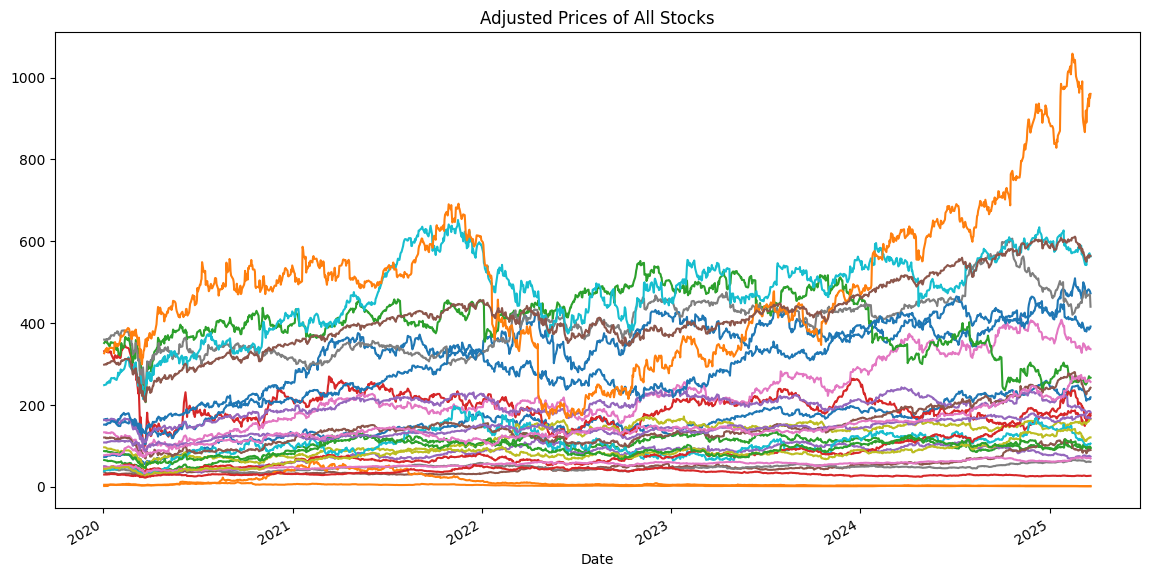

In [107]:
import matplotlib.pyplot as plt 

price_matrix.plot(figsize=(14,7), legend=False)
plt.title("Adjusted Prices of All Stocks")
plt.show()

### Finding the Weights for our basket of stocks

In [108]:

w_url = "https://raw.githubusercontent.com/mohmeez/portfolio-volatility-forecasting/main/data/Portfolio.csv"
w_df = pd.read_csv(w_url)

w_df.head()

,Ticker,Quantity,Sector,Close,Weight
0,AAPL,1,IT,218.270004,3.461290
1,ADAP,1,Pharmaceuticals,0.291000,0.004615
2,AGCO,1,Agriculture,93.089996,1.476206
3,BA,2,Military Engineering,178.110001,2.824439
4,BG,4,Agriculture,73.250000,1.161586


In [109]:
# intersection of tickers
portfolio_tickers = w_df['Ticker'].tolist()
available_tickers = [t for t in portfolio_tickers if t in returns_matrix.columns]

# filter the weights DataFrame to only those tickers
w_df_filtered = w_df[w_df['Ticker'].isin(available_tickers)].copy()

# reorder returns_matrix columns to match the order in w_df_filtered
returns_sub = returns_matrix[available_tickers]

# extract weights in correct order
weights = w_df_filtered.set_index('Ticker').loc[available_tickers, 'Weight'].values

# normalize so weights sum to 1
weights = weights / weights.sum()

In [110]:
portfolio_view = pd.DataFrame({
    "Ticker": available_tickers,
    "Weight": weights
})

print(portfolio_view)
print("\nSum of weights:", portfolio_view["Weight"].sum()) 

   Ticker    Weight
0    AAPL  0.034613
1    ADAP  0.000046
2    AGCO  0.014762
3      BA  0.028244
4      BG  0.011616
5    CALM  0.014145
6     CAT  0.053247
7    CSCO  0.009562
8     CVX  0.026126
9    DDOG  0.016655
10     DE  0.074917
11   GRWG  0.000201
12    HUM  0.042209
13   IBKR  0.027491
14    IEX  0.028847
15    JPM  0.038317
16     KO  0.010890
17    LMT  0.069727
18     MS  0.019052
19   MSCI  0.089210
20   MSFT  0.062045
21   NFLX  0.152281
22    OSK  0.015189
23    PFE  0.004167
24     PG  0.026433
25    SPY  0.089435
26   TMUS  0.040571

Sum of weights: 0.9999999999999999


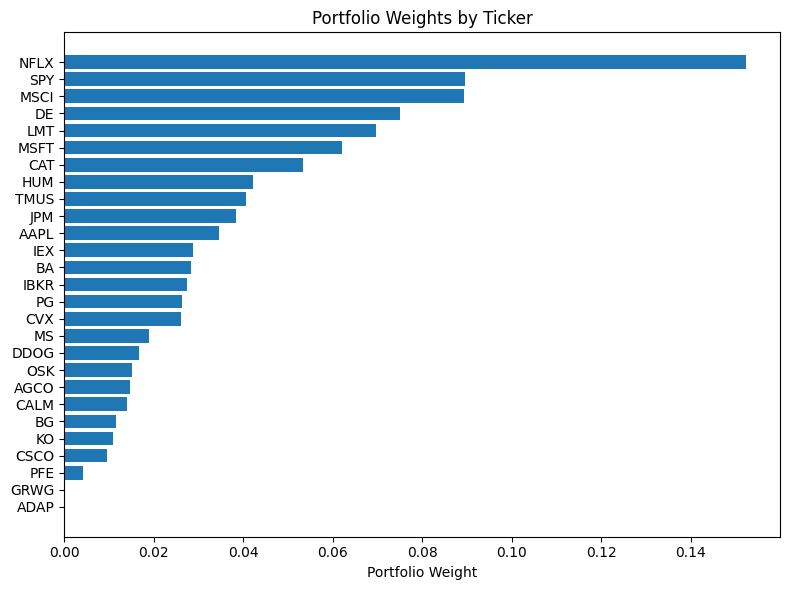

In [111]:
plot_df = portfolio_view.sort_values("Weight", ascending=True)

plt.figure(figsize=(8, 6))
plt.barh(plot_df["Ticker"], plot_df["Weight"])
plt.xlabel("Portfolio Weight")
plt.title("Portfolio Weights by Ticker")
plt.tight_layout()
plt.show()

### Creating Portfolio Return 

In [112]:
import numpy as np


port_ret = returns_sub @ weights   # (T × N) · (N × 1) = (T × 1)
port_ret.name = "PortfolioReturn"

port_ret.index = pd.to_datetime(port_ret.index)


port_ret.head()


Date
2020-01-06    0.006915
2020-01-07   -0.007120
2020-01-08    0.009818
2020-01-09    0.002831
2020-01-10   -0.008950
Name: PortfolioReturn, dtype: float64

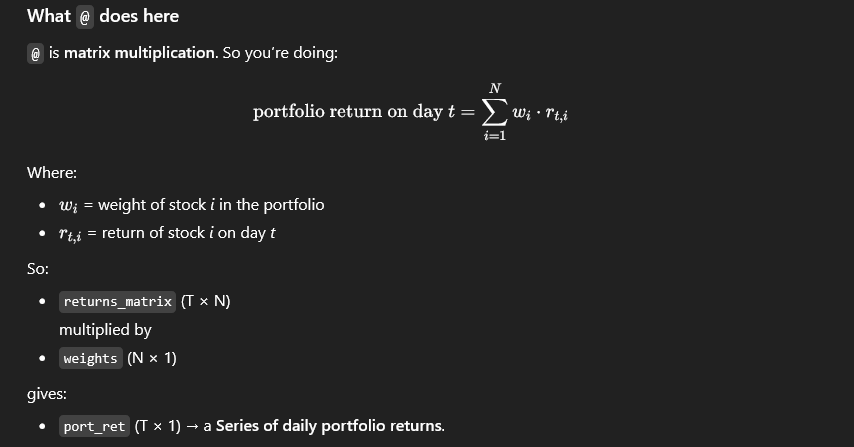

In [113]:
port_ret.tail()

Date
2025-03-17    0.017206
2025-03-18   -0.005950
2025-03-19    0.012222
2025-03-20   -0.005430
2025-03-21   -0.002761
Name: PortfolioReturn, dtype: float64

### Plot the actual portfolio returns

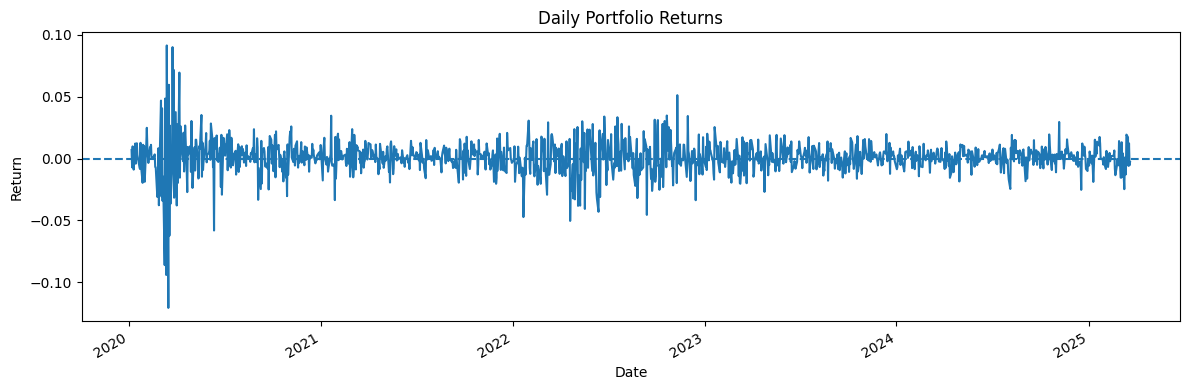

In [114]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
port_ret.plot()
plt.axhline(0, linestyle="--")
plt.title("Daily Portfolio Returns")
plt.xlabel("Date")
plt.ylabel("Return")
plt.tight_layout()
plt.show()

### Predicting 30 Day rolling volatility

In [115]:
from statsmodels.tsa.holtwinters import Holt


# 30-day rolling volatility (daily, not annualized)
roll_vol_30d = port_ret.rolling(window=30).std().dropna()

roll_vol_30d.tail()

Date
2025-03-17    0.010269
2025-03-18    0.010221
2025-03-19    0.010435
2025-03-20    0.010456
2025-03-21    0.010432
Name: PortfolioReturn, dtype: float64

### Defining Dates for the forecast period



In [116]:
horizon = 30

last_date = roll_vol_30d.index[-1]

future_dates = pd.date_range(
    start=last_date + pd.Timedelta(days=1),  # or BDay(1) if you want business days only
    periods=horizon,
    freq='B'  # business days; use 'D' for calendar days
)

### Forecast volatility for the next 30 days from the last available business day in the dataset using Simple Exponential Smoothing (EWM)


In [117]:
# smooth the 30-day rolling volatility with EWMA
alpha = 0.1  # smoothing parameter
vol_smoothed = roll_vol_30d.ewm(alpha=alpha, adjust=False).mean()

# one-step-ahead forecast is the last smoothed value:
ses_forecast_level = vol_smoothed.iloc[-1]

# for a 30-day horizon, SES forecast will be flat:
ses_forecast = pd.Series(
    ses_forecast_level,
    index=future_dates,
    name="SES_vol_forecast"
)

ses_forecast.tail()

2025-04-28    0.009136
2025-04-29    0.009136
2025-04-30    0.009136
2025-05-01    0.009136
2025-05-02    0.009136
Freq: B, Name: SES_vol_forecast, dtype: float64

### Forecast volatility for the next 30 days from the last available business day in the dataset using HOLT 

In [118]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="statsmodels")
warnings.filterwarnings("ignore", category=FutureWarning, module="statsmodels")

holt_model = Holt(roll_vol_30d).fit(optimized=True)
print(holt_model.params)

vol_forecast_daily = holt_model.forecast(horizon)   # Series of length 30

vol_forecast_daily.index = future_dates

vol_forecast_daily.tail()

{'smoothing_level': np.float64(0.9478571428571428), 'smoothing_trend': np.float64(0.20806620209059232), 'smoothing_seasonal': np.float64(nan), 'damping_trend': nan, 'initial_level': np.float64(0.009902767312561058), 'initial_trend': np.float64(-3.28280890739361e-05), 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


2025-04-28    0.014717
2025-04-29    0.014881
2025-04-30    0.015046
2025-05-01    0.015210
2025-05-02    0.015374
Freq: B, dtype: float64

### Forecast volatility for the next 30 days from the last available business day in the dataset using Garch

In [119]:
from arch import arch_model

r = port_ret * 100

# GARCH(1,1) with constant mean and normal errors
garch = arch_model(r, vol='Garch', p=1, q=1, mean='Constant', dist='normal')
garch_res = garch.fit(update_freq=10, disp='off')   # disp='off' to suppress output

### Fit a GARCH model to portfolio returns

In [120]:

# GARCH(1,1) with constant mean and normal errors
garch = arch_model(r, vol='Garch', p=1, q=1, mean='Constant', dist='normal')
garch_res = garch.fit(update_freq=10, disp='off')   # disp='off' to suppress output


garch_forecast = garch_res.forecast(horizon=horizon)

# Multi-step-ahead conditional variances (in percent^2)
var_forecast = garch_forecast.variance.iloc[-1].values   # length = 30

# Daily vol forecast in decimal return units (like your rolling vol)
garch_sigma = np.sqrt(var_forecast) / 100.0              # divide by 100 to undo scaling

# Put into a Series with the same future index you already created
garch_vol_daily = pd.Series(garch_sigma, index=future_dates, name="GARCH_vol")
garch_vol_daily.head()

2025-03-24    0.011646
2025-03-25    0.011679
2025-03-26    0.011711
2025-03-27    0.011742
2025-03-28    0.011773
Freq: B, Name: GARCH_vol, dtype: float64

C:\Users\Mohsi\AppData\Local\Temp\ipykernel_37036\2449221007.py:3: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  plt.plot(vol_forecast_daily.index, vol_forecast_daily, "--", label="Holt forecast")


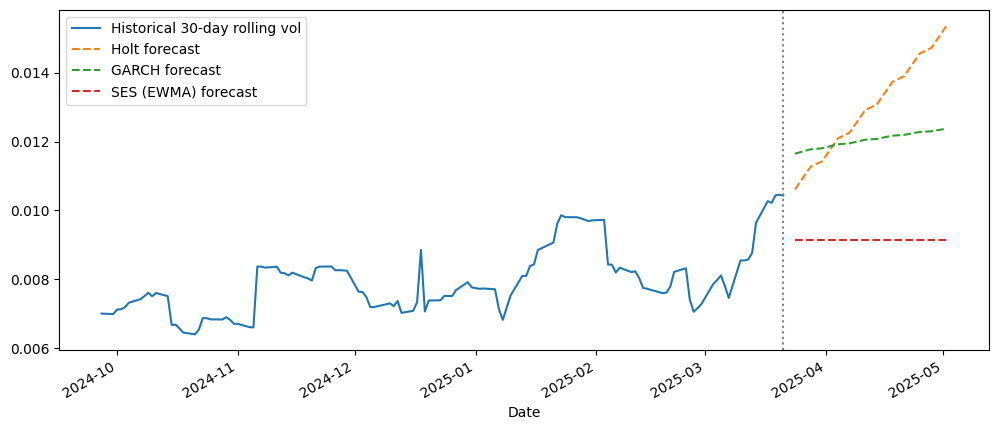

In [121]:
plt.figure(figsize=(12,5))
roll_vol_30d.tail(120).plot(label="Historical 30-day rolling vol")
plt.plot(vol_forecast_daily.index, vol_forecast_daily, "--", label="Holt forecast")
plt.plot(garch_vol_daily.index, garch_vol_daily, "--", label="GARCH forecast")
plt.plot(ses_forecast.index, ses_forecast, "--", label="SES (EWMA) forecast")
plt.axvline(x=last_date, linestyle=":", color="gray")
plt.legend()
plt.show()

This figure compares three different volatility forecasting approaches applied to the portfolio’s 30-day rolling volatility. The blue line shows the historical 30-day volatility, which rises sharply toward the end of the sample, indicating a recent increase in risk. The simple exponential smoothing (SES/EWMA) model (red dashed line) essentially assumes that this current level of volatility will persist, producing a flat forecast and treating today’s risk as typical for the next month.

Holt’s exponential smoothing model (orange dashed line) explicitly fits a trend and therefore extrapolates the recent upswing in volatility into the future, generating an aggressively rising forecast that implies risk will keep increasing day after day. 

In contrast, the GARCH model (green dashed line) reacts to the recent volatility spike but gradually flattens out, reflecting mean reversion toward a long-run volatility level. This side-by-side comparison highlights that Holt can overstate future risk when volatility has been trending up, SES may under-react by holding volatility constant, and GARCH provides a more balanced and financially realistic forecast path.

The volatility series is computed as a 30-day rolling standard deviation of daily portfolio returns, so each point represents the volatility over the previous 30 trading days. The command roll_vol_30d.tail(120) is then applied before plotting. In pandas, .tail(120) simply selects the last 120 observations from the series, without changing how each point is calculated. Consequently, the chart displays the most recent 120 days of 30-day rolling volatility, which corresponds to roughly six months of data. This is why the x-axis spans several months (e.g., from late 2024 to early 2025), even though each plotted value is still based on a 30-day window of returns.

### Value-at-Risk (VaR)

In [40]:
alpha = 0.95

# 5th percentile: 1 - 0.95 = 0.05
q_5 = np.percentile(port_ret, (1 - alpha) * 100)
VaR_95 = -q_5   # report as positive loss

print(f"Daily 95% VaR ≈ {VaR_95:.4%} loss")

Daily 95% VaR ≈ 1.8798% loss


The code estimates historical 1-day Value-at-Risk at the 95% confidence level. A daily 95% VaR of ≈ 1.88% means that, based on the distribution of past portfolio returns, on a typical trading day losses are not expected to exceed 1.88% of portfolio value 95% of the time. Equivalently, there is about a 5% probability that the portfolio will lose more than 1.88% in a single day, assuming that future return behaviour is similar to the historical sample used in the calculation.

### Expected Shortfall 


In [122]:
# select all returns that are worse than (<=) the VaR cutoff
tail_losses = port_ret[port_ret <= q_5]

# expected Shortfall (CVaR): average loss in that worst 5% tail
ES_95 = -tail_losses.mean()   # report as positive loss

print(f"Daily 95% Expected Shortfall ≈ {ES_95:.4%} loss")

Daily 95% Expected Shortfall ≈ 3.2563% loss


Expected Shortfall (ES) at the 95% level is the average loss of the portfolio on days when the loss is worse than the 95% Value-at-Risk threshold. In other words, conditional on being in the worst 5% of trading days (i.e., days when the loss exceeds the 95% VaR), Expected Shortfall measures how much the portfolio loses on average on those extreme days.

For example, If the daily 95% ES is 3% and the portfolio value is $100,000, then on days that fall in the worst 5% of outcomes, the portfolio is expected to lose about $3,000 on average.